# Graph Theory Project - Isomorphism Problem
- Ronan Waldron (G00384180)
***

### Introduction
***
This notebook aims to improve your understanding and comprehension of the Graph Isomorphism Problem in a way that is simple and easy to follow. We will begin with theory and towards the end incorporate some visuals using Python.


### The Issue We Face:

>The graph isomorphism problem is the computational problem of determining whether two infinite graphs are isomorphic.
The problem is not known to be solvable in polynomial time nor to be NP-complete, and therefore may be in the computational complexity class NP-intermediate. [1](https://en.wikipedia.org/wiki/Graph_isomorphism_problem)

For a short visual introduction to Graph Isomorphism: 
[Click Here |2](https://www.youtube.com/watch?v=9UbC7p18PDw)

### Relative Terms
***

- Graphs: A pictorial representation or a diagram that represents data or values in an organized manner. [3](https://www.splashlearn.com/math-vocabulary/geometry/graph)

![graphexample](https://media.geeksforgeeks.org/wp-content/uploads/isomorphism-question.jpg)

- Edges: A line segment on the boundary joining one vertex to another. [4](https://www.mathsisfun.com/definitions/edge.html)
- Vertex: A point on a polygon where the edges meet or where two line segmets meet. [5](https://www.splashlearn.com/math-vocabulary/geometry/vertex)

On the pentagon below A,B,C,D are vertices as all edges meet.

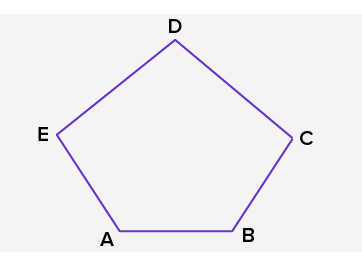

- Degree: Number of edges that are connected to the vertex.


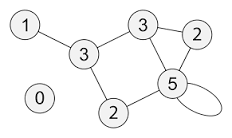

### Graph Isomorphism
***
- Described as a graph in which a single graph can have more than one form. Meaning two different graphs can have the same number of edges, vertices, and same edges connectivity. [6](https://www.javatpoint.com/graph-isomorphism-in-discrete-mathematics)

![isomorphicexample](https://static.javatpoint.com/tutorial/dms/images/graph-isomorphism-in-discrete-mathematics.png)

Above there is an example of a single graph represented in more than one form, thus making it an isomorphic graph.

#### The Graph Isomorphism Problem
Networks are all around us and can be represented as graphs, which are made up of nodes and links. The Graph Isomorphism problem asks us whether two visually different graphs are actually quite the same. A great example of this is the London Underground map, which looks different from the actual train network but is isomorphic because it preserves the connectivity of the graph. 
The problem isn't about identifying whether two graphs are isomorphic, but whether there is a faster algorithm than the ones currently known. 

![undergroundimage](https://plus.maths.org/content/sites/plus.maths.org/files/news/2015/graphiso/tube-1.jpg)

We can also see this using a bus route in Galway as shown below.

![galwaybus](https://appassets.mvtdev.com/map/41/l/502/228876/1967363.jpg)


The Graph Isomorphism problem is widely as a very challenging problem to solve. It belongs to the complexity class NP, which means that a possible solution can be checked in polynomial time, but currently there is no algorithm that exists to solve the problem in polynomial time.

The best known algorithm to solve the Graph Isomorphism problem is called the Color Refinement algorithm. It works in quasi-polynomial time, meaning that it takes proportional time to a polynomial in the logarithm of the input size. While this algorithm is recognised as a significant improvement over previous ones, it's still not a polynomial-time algorithm solution. Basically it begs the question, if a computer can quickly verify the answer to a problem that has been solved, can the same computer also quickly solve the problem?

Heuristic algorithms are often used to solve many instances of the Graph Isomorphism problem efficiently but there are still cases that are difficult to solve and are continuely explored in theoretical computer science.

A fun fact, this problem is known as a Millenium Problem meaning you can win $1 Million from the Clay Mathematics Institute for providing the first ever correct solution.

### Calculating / Implementing Graph Isomorphism
***



We can use the Weisfeiler-Lehman Test to check whether two distinct graphs are isomorphic or not.[something](https://towardsdatascience.com/testing-if-two-graphs-are-isomorphic-cf6c44ab551e)

[Code Examples](https://github.com/TNanukem/paper_implementations/blob/main/Weisfeiler%20Lehman%20Isomorphism%20Test.ipynb)



In [4]:
import copy
import pprint
import itertools
import hashlib
import networkx as nx

from collections import Counter

In [5]:
def base_WL(G_, k, verbose, n_set, initial_colors_func, find_neighbors_func):    
    if verbose:
        print('-----------------------------------')
        print('Starting the execution for the graph')
    G, n = n_set(G_)
    colors = initial_colors_func(n)

    old_colors = copy.deepcopy(colors)
    
    if verbose:
        print(f'Initial Color hashes: \n {colors} \n')

    for i in range(len(n)):
        for node in n:
            neigh_colors = "".join([colors[i][0] for i in find_neighbors_func(G, n, node)])
            
            colors[node].extend([neigh_colors])
            colors[node].sort()

        # Update with the hash
        if verbose:
            print(f'Colors before hashes at iteration {i}: {colors} \n')
        colors = {i: [hashlib.sha224("".join(colors[i]).encode('utf-8')).hexdigest()] for i in colors}
                
        if verbose:
            print(f'Colors hashes at iteration {i}: \n {colors} \n')
            print(f'Histogram: \n {sorted(Counter([item for sublist in colors.values() for item in sublist]).items())} \n')
        
        if list(Counter([item for sublist in colors.values() for item in sublist]).values()) == list(Counter([item for sublist in old_colors.values() for item in sublist]).values()) and i != 0:
            if verbose:
                print(f'Converged at iteration {i}!')
            break
        
        old_colors = copy.deepcopy(colors)

    canonical_form = sorted(Counter([item for sublist in colors.values() for item in sublist]).items())
    if verbose:
        print(f'Canonical Form Found: \n {canonical_form} \n')

    return canonical_form

In [6]:
def WL(G, k=2, verbose=False):
    def n_set(G):
        G = nx.convert_node_labels_to_integers(G)
        return G, list(G.nodes())
    
    def set_initial_colors(n):
        return {i: [hashlib.sha224("1".encode('utf-8')).hexdigest()] for i in n}
    
    def find_neighbors(G, n, node):
        return G.neighbors(node)
    
    return base_WL(G, k, verbose, n_set, set_initial_colors, find_neighbors)

In [7]:
def kWL(G, k, verbose=False):
    def n_set(G):
        G = nx.convert_node_labels_to_integers(G)
        V = list(G.nodes())
        V_k = [comb for comb in itertools.combinations(V, k)]
        return G, V_k

    def set_initial_colors(n):
        return {i: [hashlib.sha224(str(i).encode('utf-8')).hexdigest()] for i in n}

    def find_neighbors(G, V_k, node):
        print([n for n in V_k if len(set(n) - set(V_k[V_k.index(node)])) == 1])
        return [n for n in V_k if len(set(n) - set(V_k[V_k.index(node)])) == 1]

    return base_WL(G, k, verbose, n_set, set_initial_colors, find_neighbors)

In [8]:
def fkWL(G, k, verbose=False):
    def n_set(G):
        G = nx.convert_node_labels_to_integers(G)
        V = list(G.nodes())
        V_k = [comb for comb in itertools.product(V, repeat=k)]
        return G, V_k

    def set_initial_colors(n):
        return {i: [hashlib.sha224(str(i).encode('utf-8')).hexdigest()] for i in n}

    def find_neighbors(G, V_k, node):
        V = list(G.nodes())
        vals = []
        for i in range(k):
            w = []
            nodes_to_add = [u for u in V if u != V_k[V_k.index(node)][i]]
            for u in nodes_to_add:
                aux = list(V_k[V_k.index(node)])
                aux[i] = u
                w.append(tuple(aux))
            vals.extend(w)
        return vals

    return base_WL(G, k, verbose, n_set, set_initial_colors, find_neighbors)

In [9]:
def compare_graphs(G1, G2, method='WL', k=2, verbose=False):
    methods = {
        'WL': WL,
        'kWL': kWL,
        'fkWL': fkWL
    }

    # If two graphs have different numbers of nodes they cannot be isomorphic
    if len(G1.nodes()) != len(G2.nodes()):
        if verbose:
            print('Non-Isomorphic by different number of nodes!')
        return False
    
    c1 = methods[method](G1, k, verbose)
    c2 = methods[method](G2, k, verbose)

    return c1 == c2

In [10]:
G = nx.Graph()
G_edge_list = [(1, 2), (2, 3), (3, 1)]
G.add_edges_from(G_edge_list)

compare_graphs(G, G, k=2, verbose=True, method='kWL')

-----------------------------------
Starting the execution for the graph
Initial Color hashes: 
 {(0, 1): ['dd1ff31c7034df9b181dec11a0ae633bf9bee80662d76e1b5f655c2e'], (0, 2): ['af78931ab7820443f0986de9ef1f276363014d89b9dd587f16b5f3e5'], (1, 2): ['efc8967f524c37abb64097ebc4ca64c6c9a47e4ae3f6bd4bda7a52a3']} 

[(0, 2), (1, 2)]
[(0, 1), (1, 2)]
[(0, 1), (0, 2)]
Colors before hashes at iteration 0: {(0, 1): ['af78931ab7820443f0986de9ef1f276363014d89b9dd587f16b5f3e5efc8967f524c37abb64097ebc4ca64c6c9a47e4ae3f6bd4bda7a52a3', 'dd1ff31c7034df9b181dec11a0ae633bf9bee80662d76e1b5f655c2e'], (0, 2): ['af78931ab7820443f0986de9ef1f276363014d89b9dd587f16b5f3e5', 'af78931ab7820443f0986de9ef1f276363014d89b9dd587f16b5f3e5efc8967f524c37abb64097ebc4ca64c6c9a47e4ae3f6bd4bda7a52a3efc8967f524c37abb64097ebc4ca64c6c9a47e4ae3f6bd4bda7a52a3'], (1, 2): ['af78931ab7820443f0986de9ef1f276363014d89b9dd587f16b5f3e5efc8967f524c37abb64097ebc4ca64c6c9a47e4ae3f6bd4bda7a52a3af78931ab7820443f0986de9ef1f276363014d89b9dd587f16b

True

The above example is outputting True, it has passed the test for isomorphism.

Below are two examples of graphs that will fail this test.

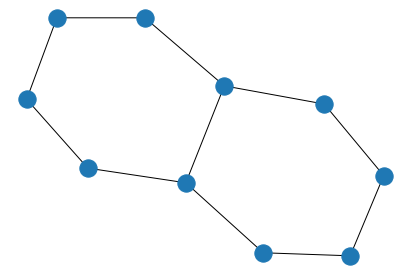


We will now evaluate these graphs using the code below.

In [11]:
def evaluation(method, k):
    print(f'Method: {method}')
    
    # Generates two non-isomorphic graphs
    G = nx.Graph()
    G_edge_list = [(1, 2), (2, 3), (1, 3), (4, 5), (5, 6), (4, 6)]
    G.add_edges_from(G_edge_list)

    H = nx.Graph()
    H_edge_list = [(1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 1)]
    H.add_edges_from(H_edge_list)
    
    G_ = nx.Graph()
    G_edge_list = [(1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 1), (3, 7), (7, 8), (8, 9), (9, 10), (10, 4)]
    G_.add_edges_from(G_edge_list)

    H_ = nx.Graph()
    H_edge_list = [(1, 2), (2, 3), (3, 4), (4, 5), (5, 1), (3, 6), (6, 7), (7, 8), (8, 9), (9, 10), (10, 6)]
    H_.add_edges_from(H_edge_list)
    
    
    G1 = nx.davis_southern_women_graph()
    G2 = nx.karate_club_graph()
    G3 = nx.les_miserables_graph()
    G4 = nx.convert_node_labels_to_integers(G3)

    G5 = nx.convert_node_labels_to_integers(G3)
    G5.remove_edge(0, 1)

    print(f'Expected: False, got: {compare_graphs(G, H, method, k)}')
    print(f'Expected: False, got: {compare_graphs(G_, H_, method, k)}')
    print(f'Expected: True, got: {compare_graphs(G1, G1, method, k)}')
    print(f'Expected: True, got: {compare_graphs(G2, G2, method, k)}')
    print(f'Expected: True, got: {compare_graphs(G3, G3, method, k)}')
    print(f'Expected: True, got: {compare_graphs(G4, G4, method, k)}')
    print(f'Expected: True, got: {compare_graphs(G5, G5, method, k)}')
    
    print(f'Expected: True, got: {compare_graphs(G3, G4, method, k)}')
    print(f'Expected: False, got: {compare_graphs(G3, G5, method, k)}')
    print(f'Expected: False, got: {compare_graphs(G4, G5, method, k)}')

In [12]:
evaluation('WL', k=3)

Expected: False, got: True
Expected: True, got: True
Expected: True, got: True
Expected: True, got: True
Expected: True, got: True
Expected: True, got: True
Expected: True, got: True
Expected: False, got: False
Expected: False, got: False



SyntaxError: invalid syntax (1281118882.py, line 3)

In [13]:
evaluation('kWL', k=3)

Expected: False, got: True
Expected: True, got: True
Expected: True, got: True
Expected: True, got: True
Expected: True, got: True
Expected: True, got: True
Expected: True, got: True
Expected: False, got: False
Expected: False, got: False



SyntaxError: invalid syntax (3991325422.py, line 3)

In [ ]:
evaluation('fkWL', k=3)

Method: fkWL
